# ECM1416: Computational Mathematics
## Worksheet #4: Probability

In [52]:
# import the numpy package in the np namespace
import numpy as np

# import the random package
import random

# this line will load the plotting function into the namespace plt.
import matplotlib.pyplot as plt

# the following lines prevent Python from opening new windows for figures. 
%matplotlib inline

## Exercise
Suppose that people enter an empty room one by one until there are $n$ people in the room. What
is the probability that at least 2 of them share a birthday? Assume birthdays are uniform
distributed random integers between 0 and 364.

1) Make an exact computation to work out the probability for various $n$.

2) Write a program to simulate the experiment many times and estimate the probability for
various $n$, see that it approximates your results from exact computation. 

3) Find the smallest value of n for which the probability of a match is greater than 0.5.

4) Explore how the number of trials in the simulation affects the variability of the estimates.

5) Suppose that people enter an empty room until a pair of people share a birthday. On average,
how many people will have to enter before there is a match? Write a program to simulate the
experiment many times and estimate the average value.

In [53]:
def exact_computation(n):
    numerator = 1
    for k in range(n):
        numerator *= 365-k
    
    denominator = pow(365, n)
    return 1- (numerator/denominator)

In [54]:
def simulate(n, k):
    successes = 0
    for trial in range(k):
        birthdays = []
        for person in range(n):
            birthday = random.randint(0, 364)
            if birthday in birthdays:
                successes += 1
                break

            birthdays.append(birthday)
    return successes/k

In [55]:
n = 1
while exact_computation(n) < 0.5:
    n += 1

print(n)
print(exact_computation(n))

23
0.5072972343239854


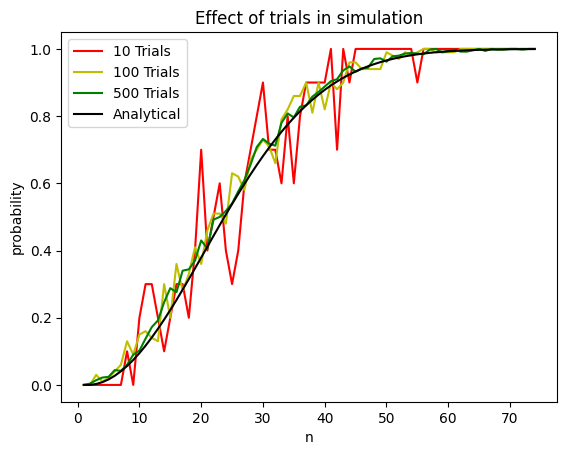

In [62]:
trials = [10, 100, 500]
min = 0
max = 75
x = np.arange(min+1, max)

def find_y(x, trials):
    y = np.zeros((max-1,))
    for i in range(x.shape[0]):
        y[i] = simulate(x[i], trials)
    return y

def actual(x):
    y = np.zeros((max-1,))
    for i in range(x.shape[0]):
        y[i] = exact_computation(i)
    return y

# Set the plot settings
plt.title("Effect of trials in simulation")
plt.xlabel("n")
plt.ylabel("probability")

plt.plot(x, find_y(x, trials[0]), color='r', label='10 Trials')
plt.plot(x, find_y(x, trials[1]), color='y', label='100 Trials')
plt.plot(x, find_y(x, trials[2]), color='g', label='500 Trials')
plt.plot(x, actual(x), color='k', label='Analytical')

plt.legend()
plt.show()

In [81]:
def average_before(k):
    average = 0
    for trial in range(k):
        birthdays = []
        for person in range(365):
            birthday = random.randint(0, 364)
            if birthday in birthdays:
                average += person
                break

            birthdays.append(birthday)
    return average/k

print(average_before(10))

24.4
